# Kollokasjoner for nøkkelord

Jeg foreslår disse ordene til stolper - hvis du Helge heller vil ha noen andre, så rop ut. Tanken er jo her å underbygge argumentasjonen som allerede er der i artikkelen om hvordan de to begrepene aggregerer meninger over tid. Lars skal utføre dette (pluss skrive tekst til metodedelen) senere i dag.

Helse:
- trivsel
- klima
- kosthold
- industri

Sykdom:
- skade
- lidelse
- feilernæring
- uførhet



In [123]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
from dhlab.module_update import update, css, code_toggle
import numpy as np

In [19]:
css()

In [20]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Benevnelser \n"
    navn += "<span style='font-size:150%'>{stuff}</span>".format(stuff= ', '.join(categories['propr']))
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(Grouping[cat]) ) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [21]:
import pandas as pd

In [22]:
import ast

In [23]:
#colls_before = pd.read_json('demokrati_before.json')

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [26]:
cliques = lambda G: [list(x) for  x in list(gnl.make_cliques_from_graph(G.to_undirected())[1].values())]
    

## Definer nøkkelordet

noteboken blir kjørt flere ganger, en notebook for hvert nøkkelord, *influensa*, *helse*

In [27]:
nøkkelord = 'sykdom'

In [28]:
keyword_graph = nb.make_graph(nøkkelord, cutoff=16)

In [29]:
comm = gnl.community_dict(keyword_graph)

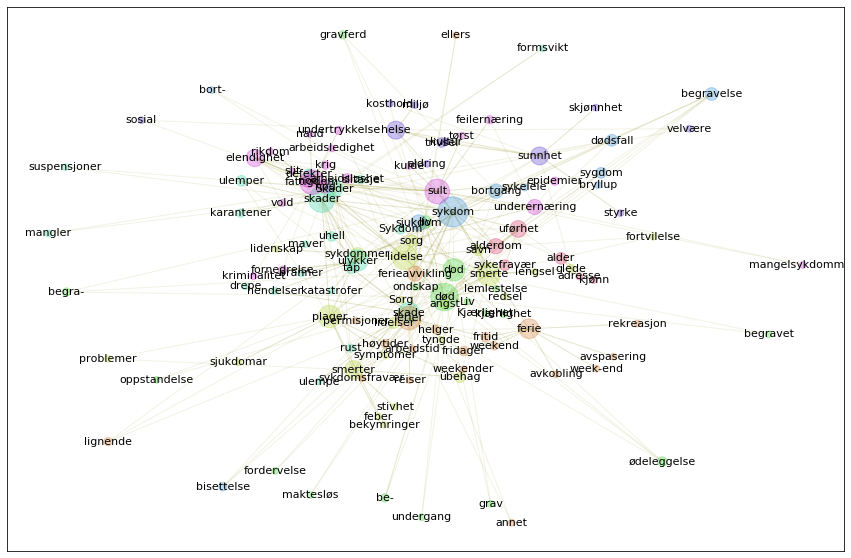

In [30]:
gnl.show_graph(keyword_graph, spread=0.8, fontsize=11)

In [31]:
keyword_cliques = cliques(keyword_graph)

# Grafens klikkstruktur (klikk = clique)

Klikkstrukturen er fin for å se overlapp og forskjellige kontekster hvor nøkkelordet forekommer. 

In [32]:
for i in keyword_cliques:
    mu.printmd("<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(i)))

<span style='font-size:1.1em'>velvære, nod, bryllup, fornedrelse, alderdom, epidemier, arbeidsledighet, smerter, skader, helse, alder, slit, ulemper, undertrykkelse, sorg, nød, uførhet, dødsfall, sykdommer, bortgang, fattigdom, problemer, kultur, Skader, sult, sykdom, kosthold, lidelser, smerte, dod, elendighet, ødeleggelse, død, aldring, underernæring, sygdom, ondskap, savn, begravelse, trivsel, ulykker, feilernæring, plager, übehag, sjukdom, angst, sunnhet, vold, uhell, krig, lidelse, Sykdom, skade, arbeidsløshet, liv, mangelsykdommer</span>

<span style='font-size:1.1em'>sorg, nød, smerte, elendighet, nod, død, krig, underernæring, lidelse, fattigdom, sult, sykdom</span>

<span style='font-size:1.1em'>skader, plager, sykdom, smerter</span>

<span style='font-size:1.1em'>uførhet, sykdom, alderdom, død</span>

<span style='font-size:1.1em'>nød, nod, elendighet, lidelse, fattigdom, sult, sykdom</span>

# Topoi fra grafen

Der klikkstrukturen kombinerer færre element, er alle nodene i grafen med og definerer et topos.

In [33]:
pos=""
for x in comm:
    pos += "### " + x + "\n"
    pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(comm[x]) ) + "\n"
mu.printmd(pos)

### lidelse-smerte
<span style='font-size:1.1em'>lidelse, smerte, plager, smerter, sykdommer, sorg, lidelser, savn, übehag, angst, glede, bekymringer, Sorg, lidenskap, fortvilelse, symptomer, sjukdomar, problemer, feber, lengsel, tyngde, stivhet, redsel</span>
### død-dod
<span style='font-size:1.1em'>død, dod, liv, ødeleggelse, be-, gravferd, begra-, fordervelse, undergang, oppstandelse, Kjærlighet, kjærlighet, maktesløs, ondskap, Liv, grav, lemlestelse, begravet</span>
### skader-ulykker
<span style='font-size:1.1em'>skader, ulykker, skade, Skader, ulemper, tap, defekter, uhell, Sykdom, rust, karantener, slitasje, maver, drepe, formsvikt, mangler, branner, katastrofer, ulempe, suspensjoner, hendelser</span>
### sykdom-sjukdom
<span style='font-size:1.1em'>sykdom, sjukdom, bortgang, begravelse, dødsfall, sygdom, bisettelse, bryllup, sykeleie, bort-</span>
### sunnhet-helse
<span style='font-size:1.1em'>sunnhet, helse, trivsel, skjønnhet, miljø, velvære, styrke, aldring, sosial, kultur, kosthold</span>
### fattigdom-sult
<span style='font-size:1.1em'>fattigdom, sult, elendighet, underernæring, nød, nod, arbeidsløshet, fornedrelse, epidemier, undertrykkelse, feilernæring, krig, arbeidsledighet, slit, rikdom, naud, kulde, vold, tørst, kriminalitet, mangelsykdommer</span>
### uførhet-alderdom
<span style='font-size:1.1em'>uførhet, alderdom, alder, sykefravær, adresse, kjønn</span>
### ferier-ferie
<span style='font-size:1.1em'>ferier, ferie, ferieavvikling, fridager, fritid, weekend, høytider, helger, lignende, ellers, reiser, week-end, avkobling, annet, rekreasjon, avspasering, permisjoner, weekender, arbeidstid, sykdomsfravær</span>


# Assosiasjoner fra kollokasjonene

<span style="font-size:150%">nb.collocation(keyword, yearfrom=1950, yearto=2000, before=10, after=10, corpus='avis')</span>


Her ser vi først på referansekorpuset, og validerer det. Det er gruppert på tiår.

In [34]:
reference = pd.read_json('../Avisdata/avis_agg.json')

In [35]:
barchart = lambda word, df: df.loc[word].plot(kind='bar', rot=0, figsize=(10,5),title=word);

In [37]:
keyword = nøkkelord

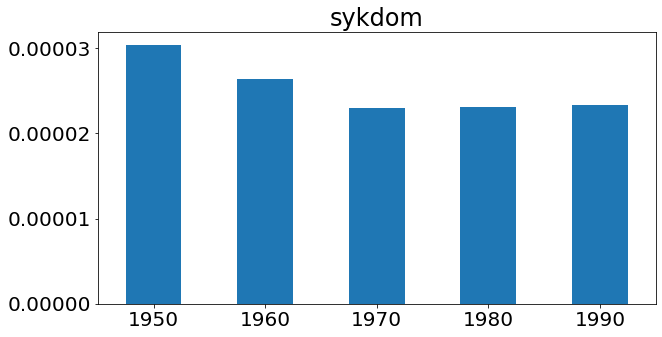

In [38]:
barchart(keyword, reference);

In [79]:
collocations = dict()
step = 1
for i in range(1950, 2000):
    try:
        collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
    except:
        try:
            collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
        except:
            print("gir opp", i)

In [80]:
colls = nb.frame(collocations)

In [81]:
colls = pd.concat([nb.frame(collocations[i], i) for i in collocations], axis=1).fillna(0)

In [82]:
def group_frames(df, bins=10, mode='rel'):
    agg = pd.DataFrame()
    step = 10
    for i in range(0, len(df.columns), step):
        agg[df.columns[i]] = df[df.columns[i:i+step]].sum(axis=1)
    return agg

In [83]:
agg = group_frames(colls)

In [84]:
nb.normalize_corpus_dataframe(agg)

True


# Opptelling

In [85]:
reference.sort_values(by=reference.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,0.0678003,0.0636145,0.0626906,0.0639755,0.0677927
",",0.0422489,0.0412801,0.0360161,0.0375341,0.0360303
i,0.0245355,0.0246246,0.0241509,0.0223459,0.020813
og,0.0207927,0.021255,0.0188187,0.0187015,0.0167394
er,0.0112082,0.0110687,0.0112091,0.0109266,0.0102024
til,0.0116211,0.0112357,0.0110929,0.010449,0.00925942
det,0.011029,0.0104679,0.00987488,0.0087761,0.00727579
som,0.0100824,0.0100878,0.00975404,0.00902762,0.00786269
for,0.00917307,0.00942805,0.00930159,0.00870384,0.00758499
av,0.00976008,0.00965961,0.00918297,0.00824812,0.00709569


In [86]:
agg.sort_values(by=agg.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,0.0696535,0.0664274,0.0657622,0.0670503,0.0657344
",",0.0426488,0.0419998,0.0379543,0.0388027,0.0392061
og,0.0289121,0.0330688,0.0321346,0.0326677,0.0314667
i,0.0195282,0.019236,0.0187206,0.0183178,0.0195733
av,0.0174766,0.0185436,0.0178545,0.016864,0.0171613
som,0.0148166,0.0143165,0.0148655,0.0152424,0.0145497
er,0.0147428,0.0141395,0.0145661,0.015005,0.0157792
en,0.0133938,0.0136983,0.0134416,0.0146449,0.0149378
for,0.014237,0.0133223,0.0128256,0.0127278,0.0124006
til,0.0109013,0.0116056,0.0126866,0.0120731,0.0117386


pmi = pd.DataFrame()
for i in agg:
    pmi[i] = agg[i]**1.02/(pd.concat([agg[i], reference[i]],axis=1).sum(axis=1))

In [121]:
larger = lambda n, agg, col: n*min(agg[col][agg[col] > 0])

In [270]:
pmi = pd.DataFrame()
for i in agg:
    cutoff = larger(12, agg, i)
    pmi[i] = agg[i][agg[i] >= cutoff]/reference[i]
pmi = pmi.replace([np.inf], np.nan)
pmi = pmi.fillna(1)

In [271]:
#nb.normalize_corpus_dataframe(pmi)

# Sammenligner med en referanse


<br>
<br>
<br>
<br>


# De 15 beste for passende kolonne

In [272]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
utstridt,2046.49,4793.42,2030.56,1,1
Dagpenger,1028.65,29.3708,63.3013,1,1
sykepengene,982.417,203.891,214.58,54.5561,22.3395
arbeidsuførhet,946.324,221.23,331.712,84.2795,536.498
sukkersyk,887.773,1,1,1,1
venerisk,863.536,1067.71,1,832.934,1
influensalignende,791.637,1,160.16,167.68,980.074
sykdomstiden,785.618,231.956,1,1,1
kjaerlig,776.758,1732.09,119.096,45.702,16.8304
begra-,742.868,180.591,462.052,122.757,1


In [273]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
utstridt,2046.49,4793.42,2030.56,1,1
Dagpenger,1028.65,29.3708,63.3013,1,1
sykepengene,982.417,203.891,214.58,54.5561,22.3395
arbeidsuførhet,946.324,221.23,331.712,84.2795,536.498
sukkersyk,887.773,1,1,1,1
venerisk,863.536,1067.71,1,832.934,1
influensalignende,791.637,1,160.16,167.68,980.074
sykdomstiden,785.618,231.956,1,1,1
kjaerlig,776.758,1732.09,119.096,45.702,16.8304
begra-,742.868,180.591,462.052,122.757,1


In [274]:
pmi.sort_values(by=pmi.columns[1], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
utstridt,2046.49,4793.42,2030.56,1,1
nytelsesmidlenes,1,2793.9,1,1,1
sclerose,1,2375.35,1,1,1
bagasjetyveri,1,2176.22,1,1,1
diegivning,1,2127.94,1,1,1
betalingstid,1,1954.68,1,1,1
kjaerlig,776.758,1732.09,119.096,45.702,16.8304
Follings,1,1545.56,881.185,1,1
psykosomatisk,1,1397.58,1,567.889,73.6787
registrerbare,1,1278.28,1,1,1


In [275]:
pmi.sort_values(by=pmi.columns[2], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
Arbeidstaker,1,1,4284.66,1,1
Pensjonsrettigheter,1,1,3938.23,441.111,1
Parkinsons,216.672,723.189,2444.97,865.89,2099.15
Refsums,1,304.594,2437.35,791.994,1
Føllings,1,997.578,2101.23,1939.27,2699.96
utstridt,2046.49,4793.42,2030.56,1,1
sykedag,1,1,2003.96,1,1
skolekontordamene,1,1,1850.06,1,1
pusteevne,1,1,1845.05,1,1
pliktmessige,1,1,1618.65,1,1


In [276]:
pmi.sort_values(by=pmi.columns[3], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
Jens-August,1,1,1,10760,1
Trygderettigheter,1,1,1,7914.14,1224.22
fasad,1,1,1,4288.95,1
Ferielov,1,1,1,3484.77,1
Alzheimers,1,1,1,3433.59,2082.85
arbeidsgiverperioden,1,1,1,3097.58,99.9801
Prostatacancer,1,1,1,2526.97,1
Schizofreni,1,1,1,2217.58,28.3447
Forkjølelse,1,1,442.98,2078.64,69.37
hypothyreose,1,1,1,1941.76,166.353


In [277]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
Bekhterevs,1,1,1,1,3509.04
Føllings,1,997.578,2101.23,1939.27,2699.96
motstandsevne,1,43.5124,1,92.465,2433.29
Legevaktstasjon,1,1,1,1,2418.4
Bechterews,267.005,1,1,977.377,2199.63
Crohns,1,1,1,1170.6,2167.43
Følelsesmessige,1,1,1,550.952,2117.37
Parkinsons,216.672,723.189,2444.97,865.89,2099.15
Alzheimers,1,1,1,3433.59,2082.85
uforhet,597.04,1,484.972,357.86,2001.29


<br>
<br>

# Assosiasjoner og variasjon over år.

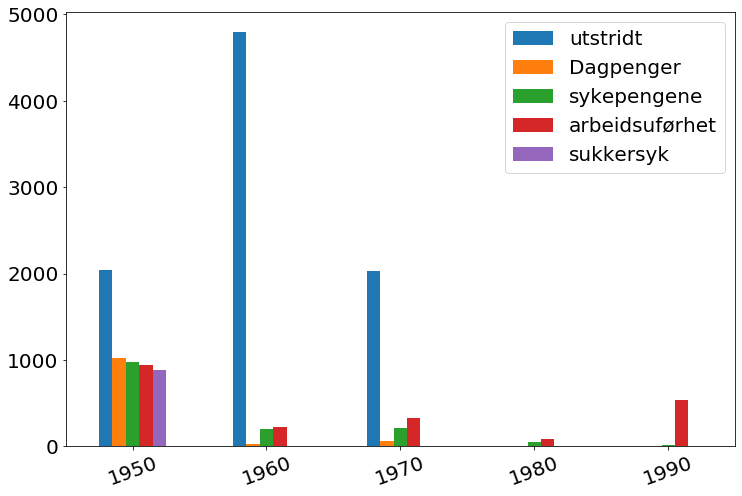

In [278]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

In [279]:
def freq_assoc_val(agg, pmi, col, top=9):
    vals = list(pmi.sort_values(by=pmi.columns[col], ascending=False).head(top).fillna(0).index)
    agg.loc[vals].sort_values(by= agg.columns[col], ascending=False).transpose().plot(kind="bar", rot=0, figsize=(12, 8))

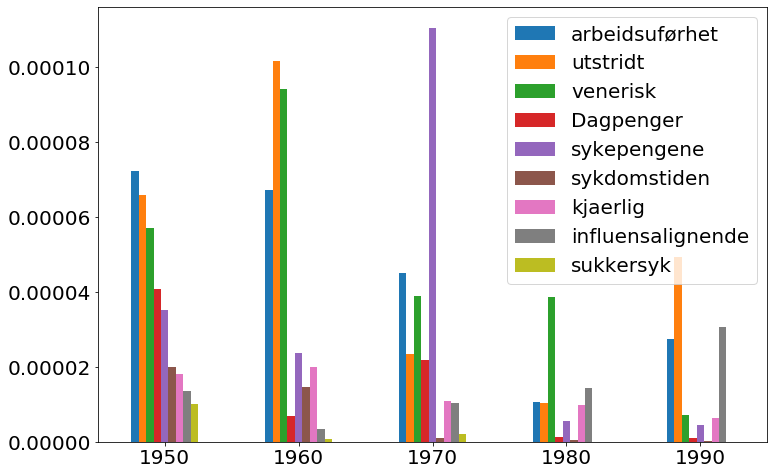

In [280]:
freq_assoc_val(agg, pmi, 0)

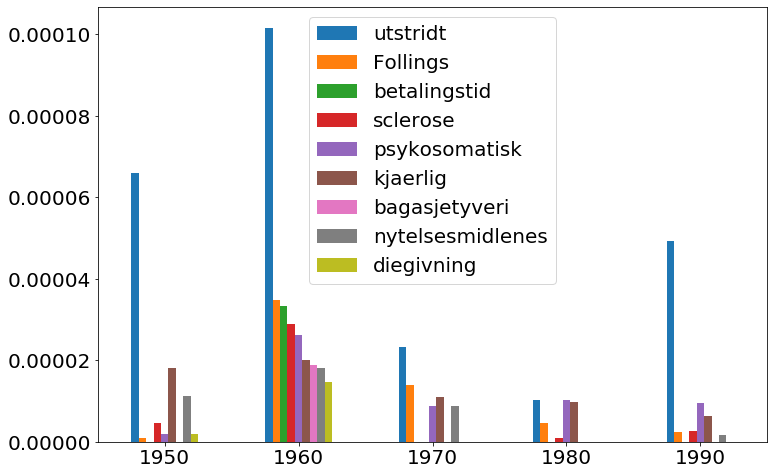

In [281]:
freq_assoc_val(agg, pmi, 1)

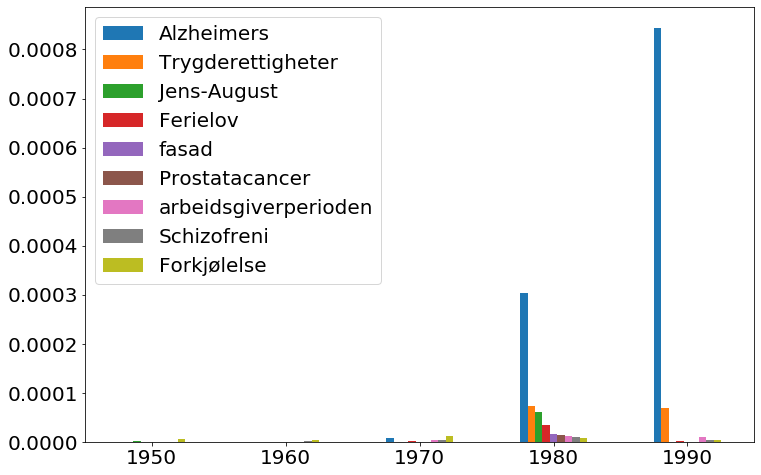

In [297]:
freq_assoc_val(agg, pmi, 3)

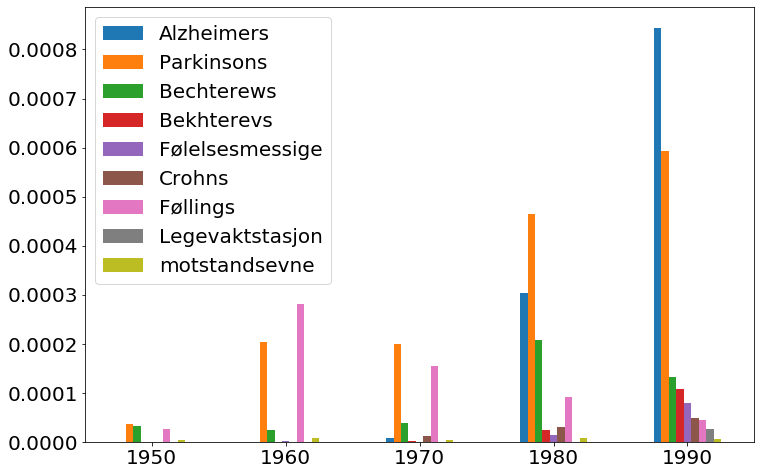

In [298]:
freq_assoc_val(agg, pmi, 4)

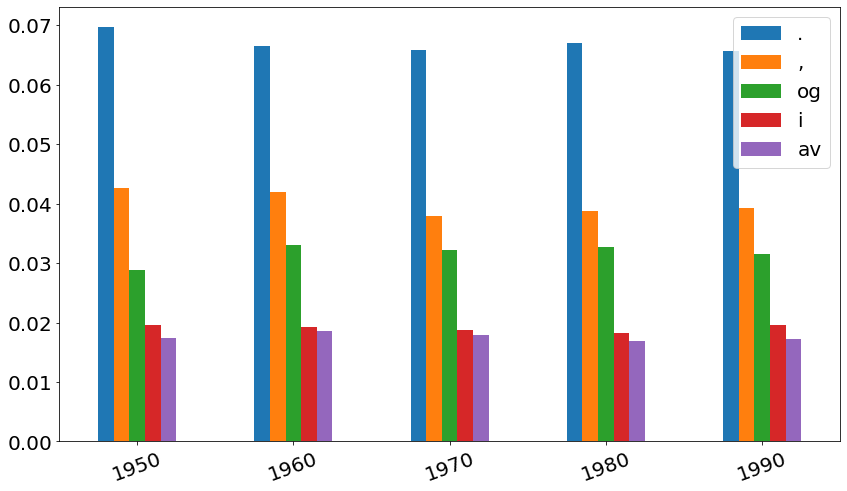

In [284]:
agg.sort_values(by=agg.columns[3], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(14, 8));


# De hundre ordene med høyest assosiasjon for perioden sortert på ordklasser

In [285]:
mdprint(pmi.sort_values(by=pmi.columns[2], ascending=False).head(200),-1)

## Benevnelser 
<span style='font-size:150%'>Arbeidstaker, Pensjonsrettigheter, Parkinsons, Refsums, Føllings, Betjentaspiranter, Lebers, Daltveit, Egenmelding, Blodpropp, SYKEPENGEORDNINGEN, Demoner, Follings, Helsekortordningen, Mædi, Sykepengene, KONTORASPIRANTER, Spisevegring, Arbeidsloshet, Hjertesykdommer, Legevitenskapen, Leddgikt, Forkjølelse, Sukkersyke, Luftveisinfeksjoner, Basedows, Hjelpetjenesten, Lepra, Datterens, Postelever, Molnar, Ekteskapslovgivningen, Rosselands, Leukemi, Særfradrag, Oddvars, Grannet, Sykdommer, Avløsning, Lungeavd, Weils, Rabies, Fortrinnsberettiget, Epilepsi, Frithjov, Sykepenger, Malaria, ALLMENNUTDANNING, Haugelands, Tobakksrøyking, Modre, Gulsott, Sult, Arbeidsgiver, Alderdom, Kronisk, Kondrasjin, Psoriasis, Bilskjema, Odlands</span>

## unknown
<span style='font-size:1.1em'>utstridt, sykedag, skolekontordamene, pusteevne, pliktmessige, legatstifteren, toppbelast-, søskensjalusi, sykepengeansvar, salgsfunksjonærer, legemsfeil, toppbelastning, folketrygdpoeng, oppgaveplikten, treningsavbrekk, influensaliknende, sommernattsdrøm, forbenn, tjenestefrihet, forsørgelse, sykesestre, ketose, uforhet, premiefritagelse, begra-, krigsfare, uforefradrag, papirhytter, tilsynskvinnene, fenylketonuri, rekreasjonsopphold, arbeidsbelastninger, svigerfars, pensjoneringsforhold, plagel, hjemtransport, behandlingsmulighetene, nervosa, speslell, arbeidsuførhet, sykefravaer, sykestønad, pleierens, kvinnearresten, toppbelastninger, tobakkskaderad, forbonn, fravaer, gravelse, røykevanene, medfelelse, hønselammelse, bortfanf, sirkulasjonsorganene, tidspoenget, sestre, alkomani, reisefravær, slitasjegikt, trygdeforhold, eiers, delta-, anorexia, bereging, lønnsutbetaling, sengeleie, kontantstøtte, dcltakelse, influensalignende, tagelse, nettolønn, pensjonsbeløp, deltakclse, rskilt, remmed, uførefradrag, bort-</span>
## adj
<span style='font-size:1.1em'>revmatisk, uhelbredelig, epidemisk, åtteårige, smittsom, tuberkuløs, multippel, arvelig, kurativ, åndssvakt, snikende, framskreden, legemlig, ondartet</span>
## subst
<span style='font-size:1.1em'>sentralbordene, fraværsdag, blødersykdommen, symptomet, arbeidsgiveravgiftene, barnedødelighet, lungeemfysem, sykmelding, ervervsevne, spedalskhet, lymfeknuter, diabetes, rekonvalesent, kreaturene, egenmelding, karenstiden, uførhet, barselpenger, prestasjonslønn, bistillinger, overanstrengelse, nedkomst, særfradraget, alkoholismen, sklerose, lepra, særfradrag, lyte, sykepengene, karensdager, koppergruver, psoriasis, yrkesskade, bortgang, misdannelse, inkubasjonstid, klassefradrag, alderdom, analfabetisme, vanhelse</span>
## verb
<span style='font-size:1.1em'>forbigåes, innberettes, stred, forbigås, kontaktes, herjes, henføres, førtidspensjonert, ferier</span>


# Hvordan utvikler ordene seg?

In [286]:
barchart = lambda w, title='': pmi.loc[w].transpose().plot(kind='bar',title=title, rot=20, figsize=(12,6)) ;

In [287]:
freqbarchart = lambda w, title='': agg.loc[w].transpose().plot(kind='bar',title=title, rot=20, figsize=(12,6)) ;

In [317]:
gchart = lambda w, title='': reference.loc[w].transpose().plot(kind='bar',title=title, rot=20, figsize=(12,6)) ;

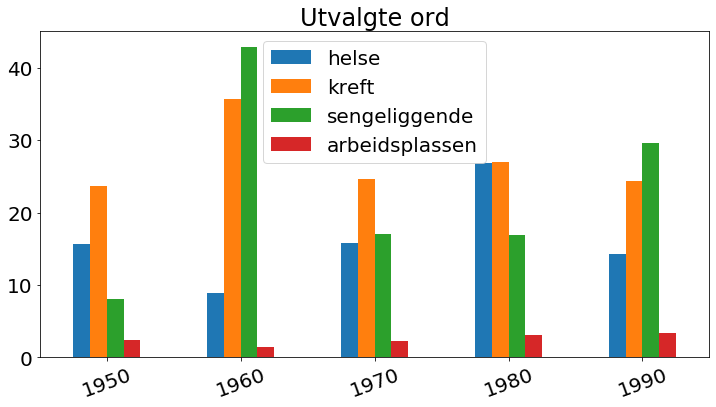

In [299]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord');

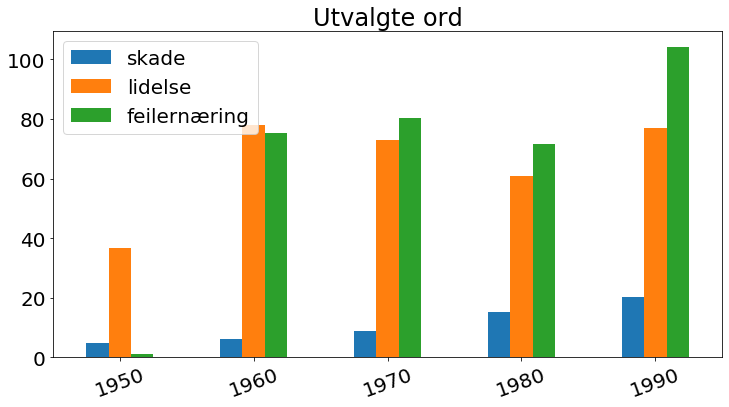

In [315]:
barchart(['skade',
'lidelse','feilernæring'], 'Utvalgte ord');

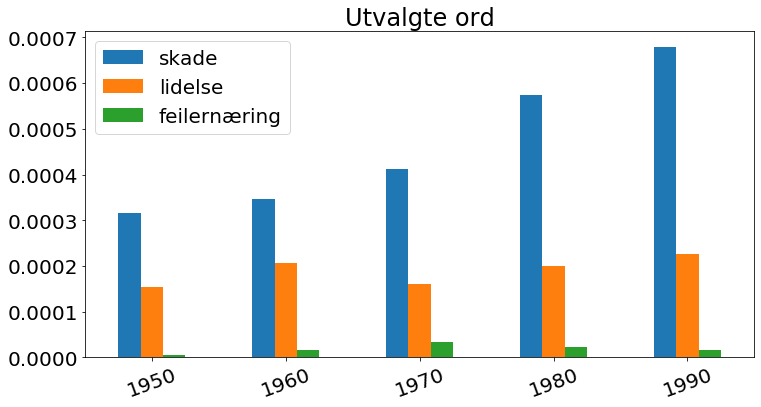

In [316]:
freqbarchart(['skade',
'lidelse','feilernæring'], 'Utvalgte ord');

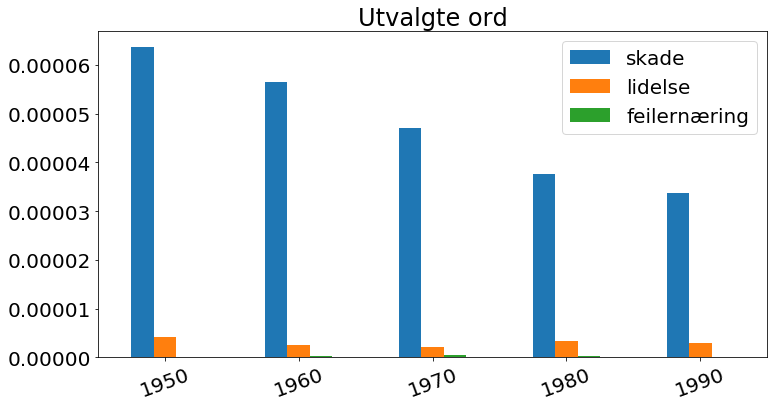

In [319]:
gchart(['skade',
'lidelse','feilernæring'], 'Utvalgte ord');

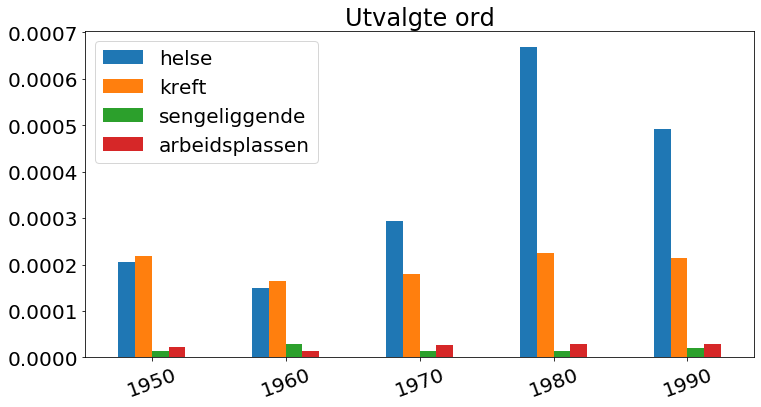

In [290]:
freqbarchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord');

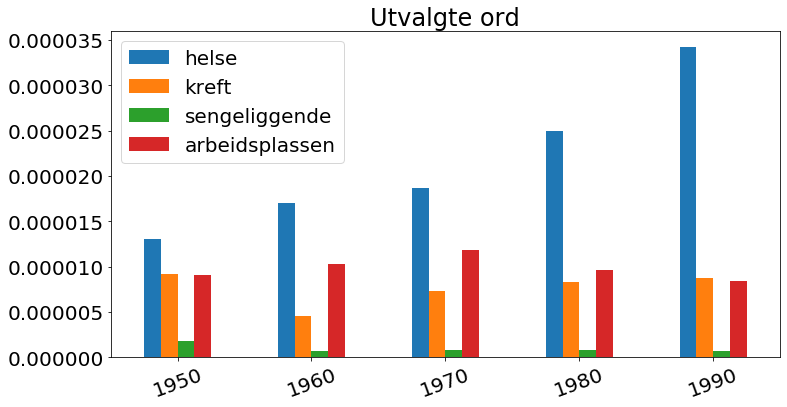

In [318]:
gchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord');

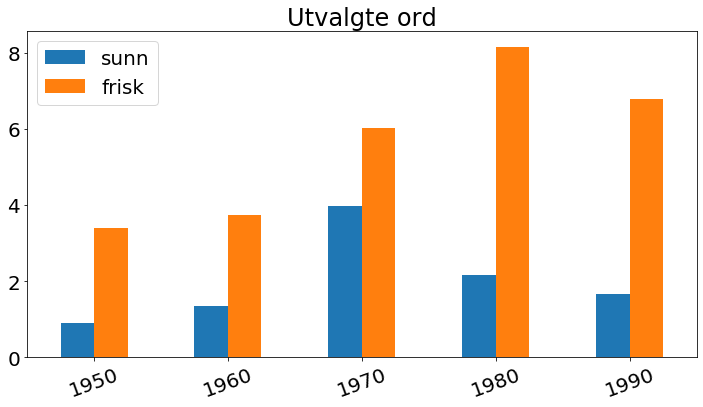

In [301]:
barchart('sunn frisk'.split(), 'Utvalgte ord');

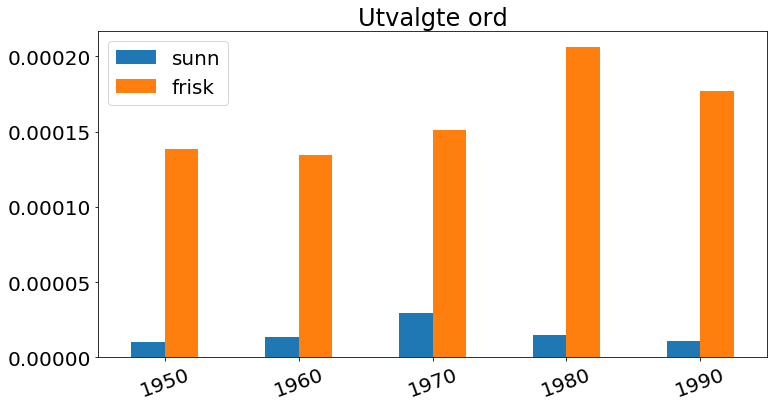

In [302]:
freqbarchart('sunn frisk'.split(), 'Utvalgte ord');

<br>
<br>

# De fremste blandt topoi 

Merk at på grunn av louvain-algoritmen kan topoiene endre seg litt fra kjøring til kjøring

In [293]:
commchart = lambda x, part =(1,6): barchart(comm[list(comm.keys())[x]][part[0]:part[1]], list(comm.keys())[x]);

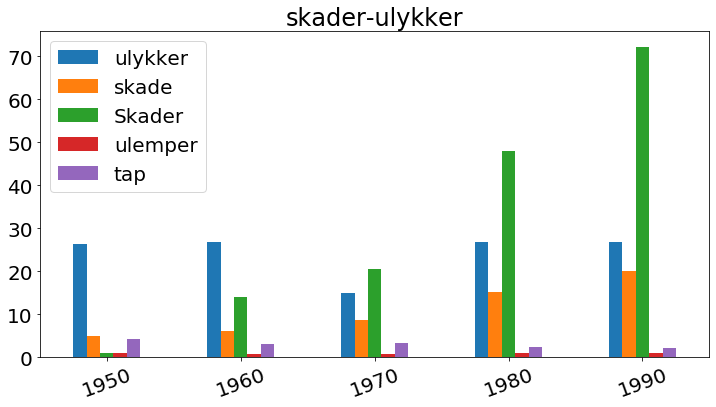

In [294]:
commchart(2)

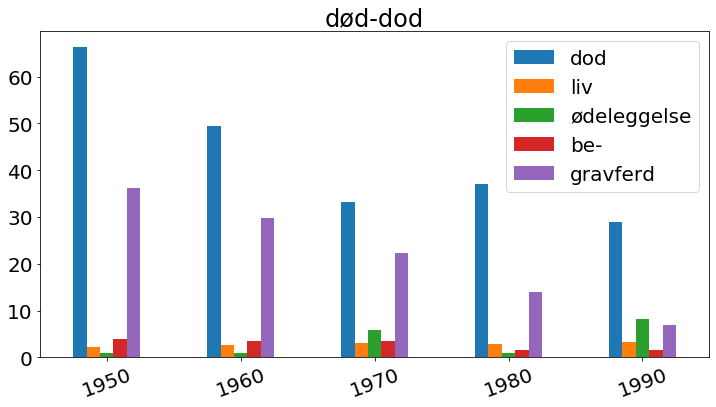

In [295]:
commchart(1)

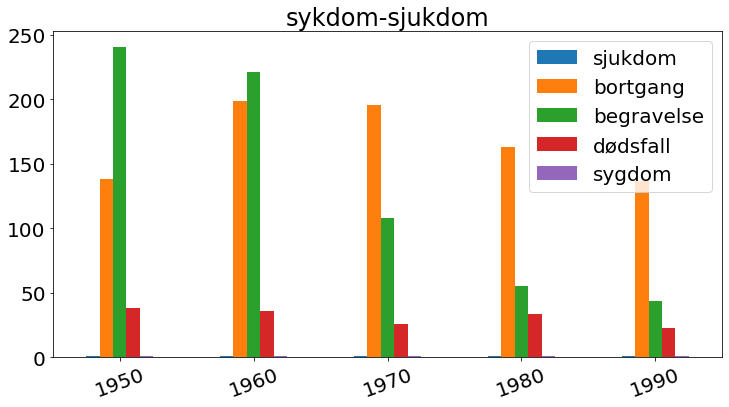

In [296]:
commchart(3)

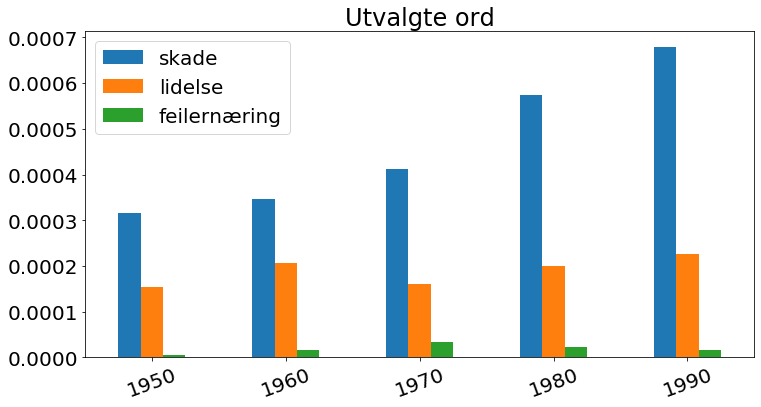

In [316]:
freqbarchart(['skade',
'lidelse','feilernæring'], 'Utvalgte ord');

In [348]:
def diff_df(df):
    diff = pd.DataFrame()
    for i in range(1, len(df.columns)):
        diff[df.columns[i]] = df[df.columns[i]]/df[df.columns[i-1]]
    diff = diff.replace([np.inf], np.nan)
    diff = diff.dropna()
    return diff

def growing_df(df):
    diff = pd.DataFrame()
    for i in range(1, len(df.columns)):
        diff[df.columns[i]] = df[df.columns[i]] >= df[df.columns[i-1]]
    diff = diff.replace([np.inf], np.nan)
    diff = diff.dropna()
    return diff

def dropping_df(df):
    diff = pd.DataFrame()
    for i in range(1, len(df.columns)):
        diff[df.columns[i]] = df[df.columns[i]] <= df[df.columns[i-1]]
    diff = diff.replace([np.inf], np.nan)
    diff = diff.dropna()
    return diff

In [349]:
growing = growing_df(pmi).sum(axis=1)
dropping = dropping_df(pmi).sum(axis=1)

In [350]:
grow = pmi.loc[growing[growing >= 4].index]
growth_set = grow[(grow[1950] > 10) & (grow[1990] > 10)]

In [351]:
growth_set.style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
alvorlig,14.3935,14.6557,21.0126,25.8192,31.5891
kronisk,79.6573,92.7252,141.699,193.718,214.338
lider,41.6366,59.4354,67.4368,68.538,81.9648
lindre,25.7611,29.7302,33.5846,41.4686,48.2033
multipel,29.2047,62.4242,141.225,231.035,281.377
permisjoner,23.3731,38.1097,48.9647,132.587,192.927
poliomyelitt,13.1922,26.3137,33.6625,55.9129,117.021
tappert,10.057,23.6163,29.364,35.8779,43.8281
tids,70.9104,74.0492,76.8342,106.739,165.278
utmattelse,16.0823,19.1496,50.664,63.4056,66.3756


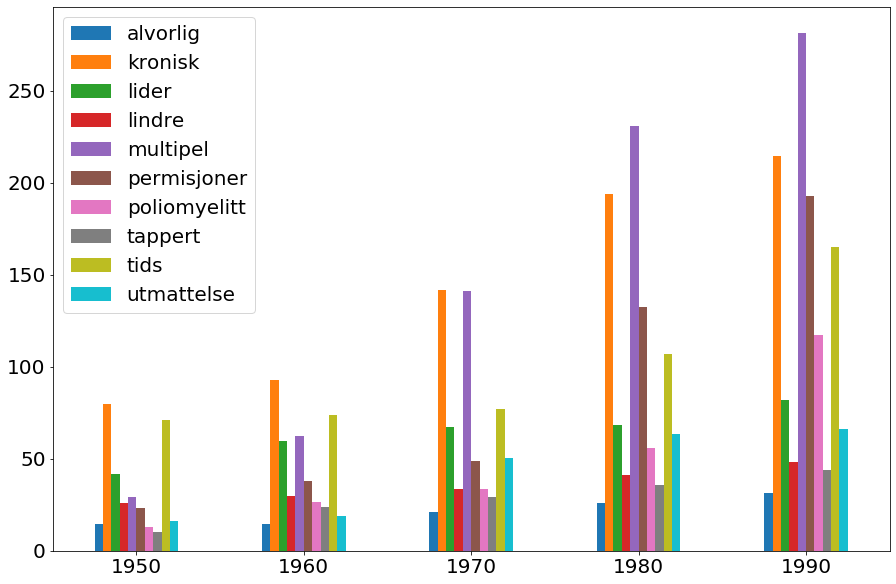

In [352]:
growth_set.transpose().plot(kind='bar', rot=0)

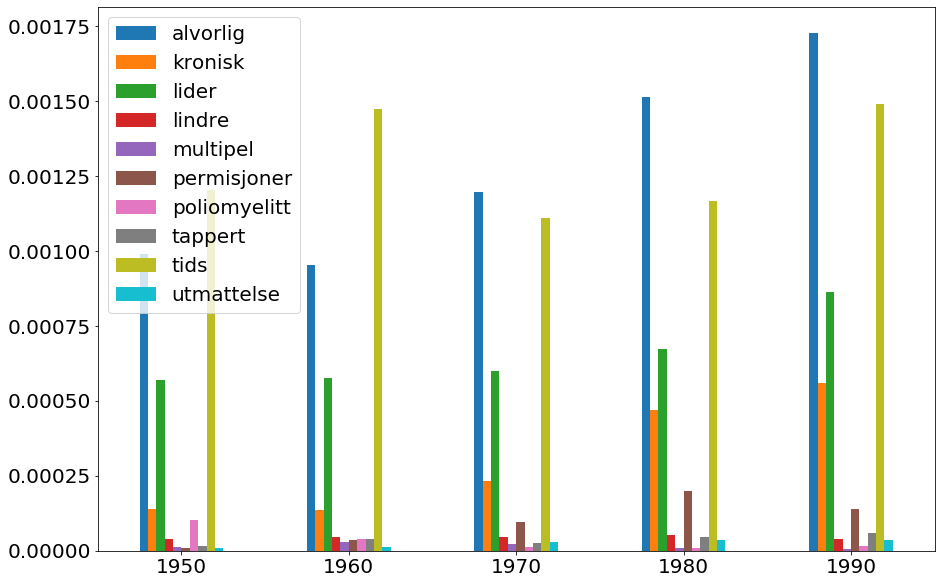

In [353]:
agg.loc[growth_set.index].transpose().plot(kind='bar', rot=0)

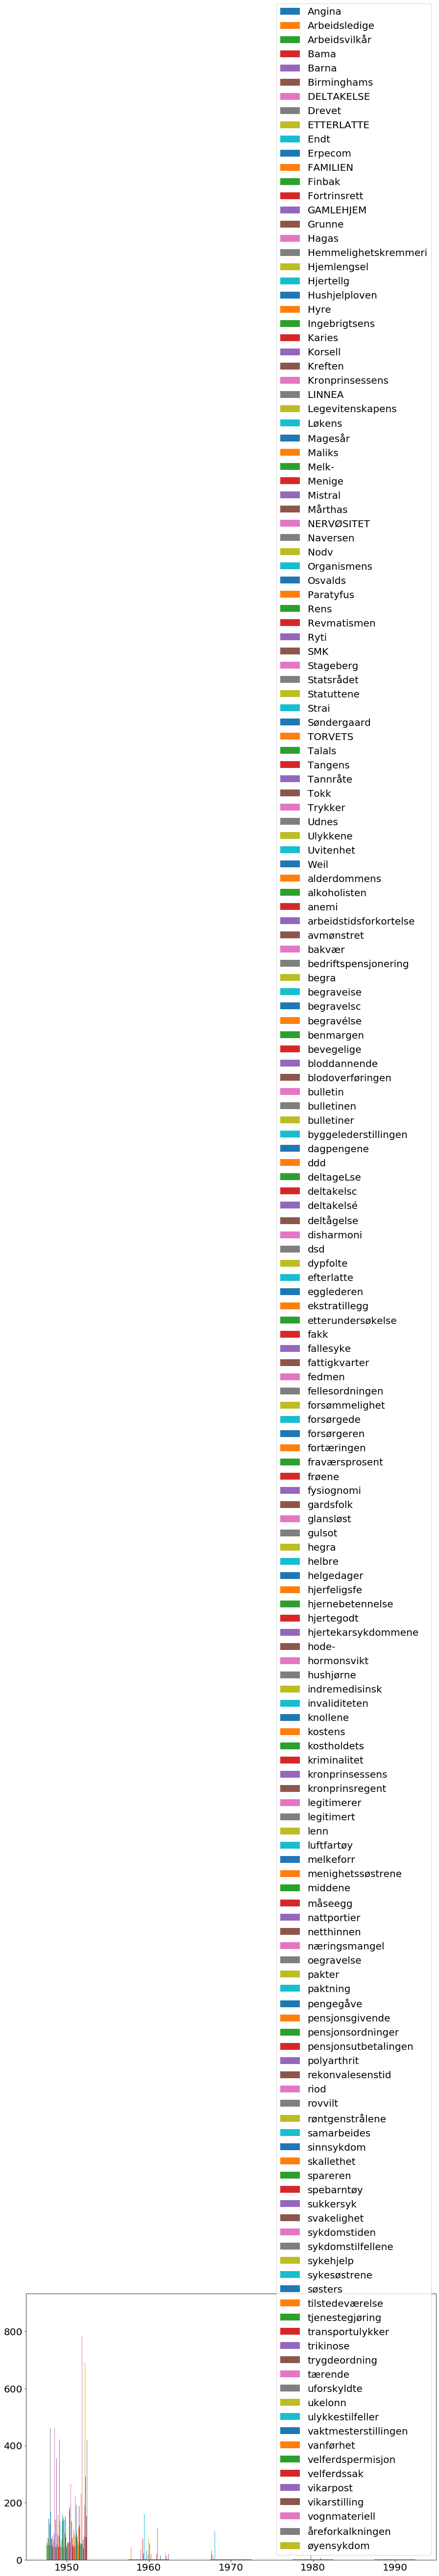

In [354]:
drop = pmi.loc[dropping[dropping >= 4].index]
drop_set = drop[(drop[1950] > 40) & (drop[1990] < 5)]

drop_set.transpose().plot(kind='bar',rot=0)